In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jun  9 18:21:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


### Import Libraries

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
from IPython.display import clear_output
%matplotlib inline

In [4]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

In [5]:
!pip install pyyaml==5.1
!pip install torch==1.8
!pip install torchvision==0.9.0
clear_output()

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  1.8 ; cuda:  1.8.0


In [6]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
clear_output()

In [7]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

### Read Image

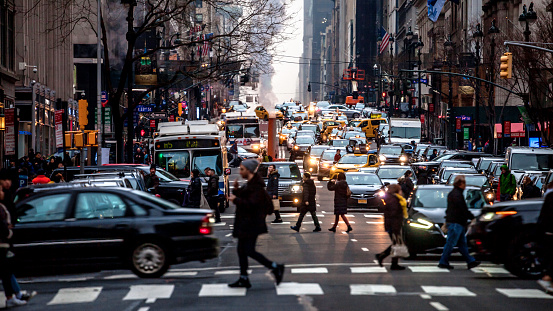

In [41]:
img = cv2.imread("./test-set.jpg")
cv2_imshow(img)

### Configure the pre-trained model

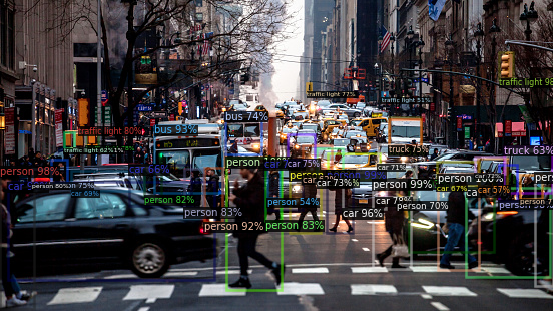

In [42]:
# Bounding Boxes with Faster RCNN R50 FPN 3x

cfg_bb = get_cfg()
cfg_bb.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))    
cfg_bb.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
cfg_bb.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

predictor_bb = DefaultPredictor(cfg_bb)
outputs_bb = predictor_bb(img)

v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg_bb.DATASETS.TRAIN[0]))
v = v.draw_instance_predictions(outputs_bb["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

### Saving the bounding box anootation into file.txt

In [43]:
image_size = outputs_bb['instances'].__dict__['_image_size']
annotation_result = outputs_bb['instances'].__dict__['_fields']

In [44]:
image_size

(311, 553)

In [45]:
bb_new = []
bb_old = annotation_result['pred_boxes']

for i in bb_old:
  convert = tf.get_static_value(i).to('cpu')
  convert = convert.numpy()
  bb_new.append(convert.astype(int))

print(bb_new)

[array([438, 174, 479, 269]), array([225, 157, 282, 289]), array([289, 170, 321, 232]), array([372, 179, 410, 269]), array([  7, 182, 213, 280]), array([326, 171, 352, 232]), array([498, 165, 516, 200]), array([499,  52, 512,  78]), array([  0, 167,  34, 308]), array([343, 169, 386, 209]), array([154, 125, 221, 192]), array([408, 179, 494, 252]), array([204, 167, 221, 222]), array([466, 187, 549, 276]), array([183, 168, 202, 208]), array([265, 164, 281, 220]), array([144, 165, 160, 195]), array([ 32, 168,  50, 184]), array([ 78,  99,  88, 126]), array([375, 164, 416, 197]), array([ 86, 130,  98, 145]), array([264, 160, 303, 210]), array([307,  83, 310,  91]), array([519, 175, 542, 199]), array([288, 133, 315, 159]), array([388, 118, 420, 145]), array([ 50, 159,  66, 183]), array([224, 111, 261, 153]), array([317, 148, 343, 179]), array([474, 156, 505, 173]), array([377, 144, 403, 165]), array([328, 152, 380, 178]), array([396, 169, 414, 201]), array([ 71, 171, 144, 191]), array([436, 1

In [46]:
new_classes = []
old_classes = annotation_result['pred_classes']

for i in old_classes:
  convert = tf.get_static_value(i).to('cpu')
  convert = convert.numpy()
  new_classes.append(convert)

print(new_classes)

[array(0), array(0), array(0), array(0), array(2), array(0), array(0), array(9), array(0), array(2), array(5), array(2), array(0), array(2), array(0), array(0), array(0), array(0), array(9), array(2), array(9), array(2), array(9), array(0), array(2), array(7), array(0), array(5), array(2), array(2), array(2), array(2), array(0), array(2), array(2), array(2), array(7), array(9), array(2), array(9), array(0), array(2), array(0), array(5), array(9)]


In [47]:
import re 

f = open('/content/annotation_result.txt', 'w')

for i in range(len(new_classes)):
  result = str(new_classes[i]) + ' ' + str(bb_new[i])
  result = re.sub('[\[\]]', '', result)
  f.write(result + '\n')

f.close()

### Keypoints Detection

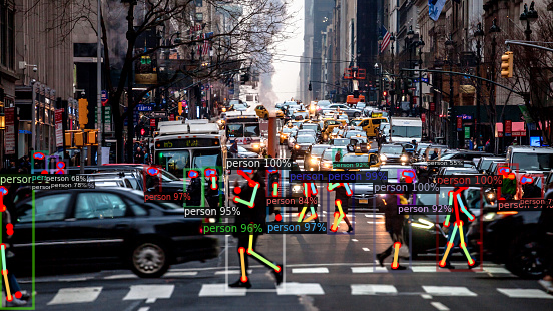

In [48]:
cfg_kp = get_cfg()
cfg_kp.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))  
cfg_kp.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
cfg_kp.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

predictor_kp = DefaultPredictor(cfg_kp)
outputs_kp = predictor_kp(img)

v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg_kp.DATASETS.TRAIN[0]))
v = v.draw_instance_predictions(outputs_kp["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

### Instance Segmentation

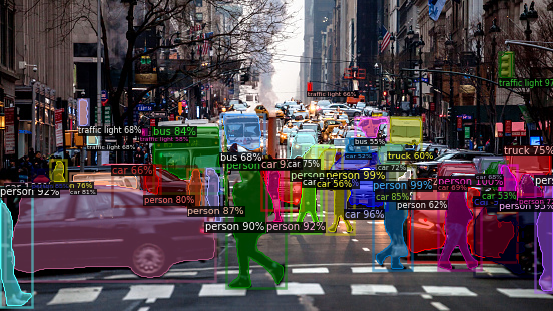

In [49]:
cfg_l = get_cfg()
cfg_l.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))    
cfg_l.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  
cfg_l.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

predictor_l = DefaultPredictor(cfg_l)
outputs_l = predictor_l(img)

v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg_l.DATASETS.TRAIN[0]))
v = v.draw_instance_predictions(outputs_l["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

---